In [1]:
%reset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#read data
data = pd.read_pickle('./data/properties.pkl')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 7 columns):
ID          1422 non-null object
area        306 non-null float64
garage      1422 non-null int64
location    1422 non-null category
pool        1422 non-null int64
price       1123 non-null float64
type        1422 non-null category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 70.3+ KB


## Identify a Correlation

In [3]:
corr = pd.DataFrame({'price':data['price'], 'area':data['area']})
corr = corr.dropna()
corr.describe()

,price,area
count,2.370000e+02,237.000000
mean,5.245300e+05,259.599156
std,5.695864e+05,634.595744
min,7.760000e+04,0.000000
25%,2.460000e+05,107.000000
50%,3.400000e+05,150.000000
75%,6.000000e+05,200.000000
max,6.300000e+06,7000.000000


Scatter plot to see if there seems to be a correlation

Text(0,0.5,'Area (sq. meters)')

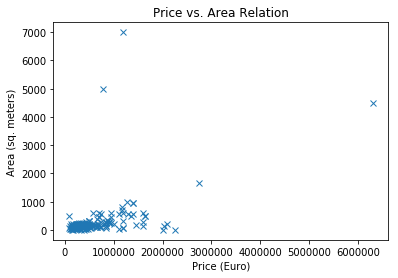

In [4]:
plt.figure()
plt.plot(corr['price'], corr['area'],'x')
plt.title('Price vs. Area Relation')
plt.xlabel('Price (Euro)')
plt.ylabel('Area (sq. meters)')

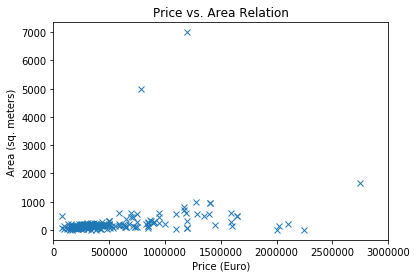

In [5]:
#look more closely at the bunched up data
plt.figure()
plt.plot(corr['price'], corr['area'],'x')
plt.title('Price vs. Area Relation')
plt.xlabel('Price (Euro)')
plt.ylabel('Area (sq. meters)')
plt.xlim(0,3000000)
plt.savefig('./plots/correlation.png',bbox_inches='tight')

Run the pearson correlation test

In [32]:
corr, pvalue = stats.pearsonr(corr['price'],corr['area'])
print('Correlation Coefficient: ' + str(corr))
print('p-value: ' + str(pvalue))

Correlation Coefficient: 0.4861296856005385
p-value: 1.8425156591037824e-15


Since p-value < 0.01, we are 99% confident the value is significant

## Statistical Tests

### Tests for Normality

H_0: The data comes from a normal distribution  
H_1: The data does not come from a normal distribution

#### Price

In [33]:
w, pvalue = stats.shapiro(data['price'].dropna())
print('Test Statistic: ' + str(w))
print('p-value: ' + str(pvalue))

Test Statistic: 0.5068840980529785
p-value: 0.0


Since the p-value is less than the 95% critical value (0.05), then we must reject H_0

In [45]:
a = stats.anderson(data['price'].dropna())
print('Test Statistic: ' + str(a[0]))
print('p-value: ' + str(a[1][3]))

Test Statistic: 122.76025380424221
p-value: 0.915


Since the p-value < the Test Statistic then we must reject H_0

Both these tests tell us that the data is not coming from an underlying normal distribution

In [38]:
mean = data['price'].dropna().mean()
variance = (data['price'].dropna().std())**2
print('Mean: ' + str(mean))
print('Variance: ' + str(variance))

Mean: 390059.1184327694
Variance: 172966930641.02246


#### Area

In [39]:
w, pvalue = stats.shapiro(data['area'].dropna())
print('Test Statistic: ' + str(w))
print('p-value: ' + str(pvalue))

Test Statistic: 0.26117587089538574
p-value: 4.261958643707674e-33


In [40]:
a = stats.anderson(data['area'].dropna())
print('Test Statistic: ' + str(a[0]))
print('p-value: ' + str(a[1][2]))

Test Statistic: 65.63126567401628
p-value: 0.777


Similarly both these tests tell us that the data is not normally dstributed.

### Test to see if there's a significant difference in the area of the property if it has a garage

Since the area is not normally distributed, we'll use the Mann Whitney-U Test rather than the independent sample t-test with continuity correction. 

In [6]:
df = pd.DataFrame({'area': data['area'],'garage': data['garage']}).dropna()

In [7]:
print('Number of readings with a garage: ' + str(len(df[df['garage']==1])))
print('Number of readings without a garage: ' + str(len(df[df['garage']==0])))

Number of readings with a garage: 66
Number of readings without a garage: 234


In [8]:
#Independent t-test since we want to test the difference between the 2 groups
mw_stat, pvalue =  stats.mannwhitneyu(df[df['garage']==1]['area'],df[df['garage']==0]['area'],alternative='two-sided')
print('Statistic Value: ' + str(mw_stat))
print('p-value: ' + str(pvalue))

Statistic Value: 9853.0
p-value: 0.00061620590432262


H_0: The two groups have an equal average area  
H_1: The two groups have a different average area

Since p-value = 6.1e-4 < 0.01 then we have enough evidence to reject H_0, thus we can conclude that properties with a garage have a different average area to properties without  garage.

In [51]:
print('Average Area of properties with a garage: ' + str(df[df['garage']==1]['area'].mean()))
print('Average Area of properties without a garage: ' + str(df[df['garage']==0]['area'].mean()))

Average Area of properties with a garage: 345.92424242424244
Average Area of properties without a garage: 226.4102564102564


So we can conclude that properties with a garage tend to have a greater area than those without a garage